# Chapter 5.1 - Dimension Reduction and Feature Extraction

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris    
from sklearn.preprocessing import StandardScaler 
from sklearn.manifold import MDS  
from sklearn.metrics import pairwise_distances 

import scipy
from sklearn.decomposition import PCA

#import warnings
#warnings.filterwarnings("ignore")

## SVD for variables transformation

V transforms correlated variables (X) into a set of uncorrelated ones (UD) that better expose the various relationships among the original data items.
  
    X = UDV𝑇 ,    (5.1)    
    XV = UDV𝑇 V,  (5.2)
    XV = UDI,     (5.3)
    XV = UD       (5.4)

At the same time, SVD is a method for identifying and ordering the dimensions along  which data points exhibit the most variation.

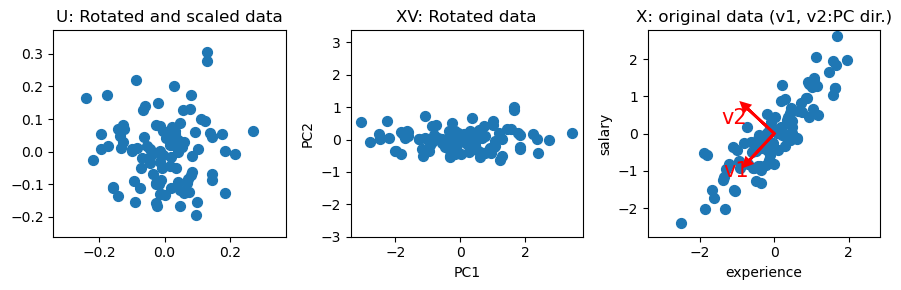

In [4]:
np.random.seed(42)  # Set random seed for reproducibility
# dataset
n_samples = 100  # Number of samples
experience = np.random.normal(size=n_samples)                            # Generate random experience data
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)  # Generate salary data
X = np.column_stack([experience, salary])                                # Combine experience and salary into a dataset

# PCA using SVD
X -= X.mean(axis=0)                                  # Centering the data (subtracting the mean) is required
U, s, Vh = scipy.linalg.svd(X, full_matrices=False)  # Perform SVD

''' 
U : Unitary matrix having left singular vectors as columns. Of shape (n_samples,n_samples) or (n_samples,n_comps), depending on full_matrices.

s : The singular values, sorted in non-increasing order. Of shape (n_comps,), with n_comps = min(n_samples, n_features).

Vh: Unitary matrix having right singular vectors as rows. Of shape (n_features, n_features) or (n_comps, n_features) depending on full_matrices.
'''

plt.figure(figsize=(9, 3))               # Create a figure with a specific size

plt.subplot(131)                         # Create a subplot for the first plot
plt.scatter(U[:, 0], U[:, 1], s=50)      # Scatter plot of the left singular vectors
plt.axis('equal')                        # Set equal aspect ratio
plt.title("U: Rotated and scaled data")  # Title for the first plot

plt.subplot(132)                         # Create a subplot for the second plot
# Project data
PC = np.dot(X, Vh.T)                     # Project the original data onto the principal components
plt.scatter(PC[:, 0], PC[:, 1], s=50)    # Scatter plot of the projected data
plt.axis('equal')                        # Set equal aspect ratio
plt.title("XV: Rotated data")            # Title for the second plot
plt.xlabel("PC1")                        # Label for the x-axis
plt.ylabel("PC2")                        # Label for the y-axis

plt.subplot(133)  # Create a subplot for the third plot
plt.scatter(X[:, 0], X[:, 1], s=50)                                     # Scatter plot of the original data
for i in range(Vh.shape[0]):                                            # Loop through the right singular vectors
    plt.arrow(x=0, y=0, dx=Vh[i, 0], dy=Vh[i, 1], head_width=0.2,       # Draw arrows for principal directions
              head_length=0.2, linewidth=2, fc='r', ec='r')             # Arrow properties
    plt.text(Vh[i, 0], Vh[i, 1],'v%i' % (i+1), color="r", fontsize=15,  # Label for each principal direction
             horizontalalignment='right', verticalalignment='top')
plt.axis('equal')                               # Set equal aspect ratio
plt.ylim(-4, 4)                                 # Set limits for the y-axis
plt.title("X: original data (v1, v2:PC dir.)")  # Title for the third plot
plt.xlabel("experience")                        # Label for the x-axis
plt.ylabel("salary")                            # Label for the y-axis
plt.tight_layout()                              # Adjust subplot parameters for a cleaner layout

## Principal Components Analysis (PCA)

• Principal components analysis is the main method used for linear dimension reduction.
                                                       
• The idea of principal component analysis is to find the 𝐾 principal components directions (called the loadings) V𝐾×𝑃 that capture the variation in the data as much as
possible.

• It converts a set of 𝑁 𝑃-dimensional observations N𝑁×𝑃 of possibly correlated variables into a set of 𝑁 𝐾-dimensional samples C𝑁×𝐾, where the 𝐾 < 𝑃. The new variables are
linearly uncorrelated. The columns of C𝑁×𝐾 are called the principal components.
    
• The dimension reduction is obtained by using only 𝐾 < 𝑃 components that exploit correlation (covariance) among the original variables.

• PCA is mathematically defined as an orthogonal linear transformation V𝐾×𝑃 that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.
    
            C_𝑁×𝐾 = X_𝑁×𝑃 V_𝑃×𝐾

• PCA can be thought of as fitting a 𝑃-dimensional ellipsoid to the data, where each axis of the ellipsoid represents a principal component. If some axis of the ellipse is small, then the variance along that axis is also small, and by omitting that axis and its corresponding principal component from our representation of the dataset, we lose only a commensurately small amount of information.

• Finding the 𝐾 largest axes of the ellipse will permit to project the data onto a space having dimensionality 𝐾 < 𝑃 while maximizing the variance of the projected data.

Variance explained by each principal component: [0.93646607 0.06353393]


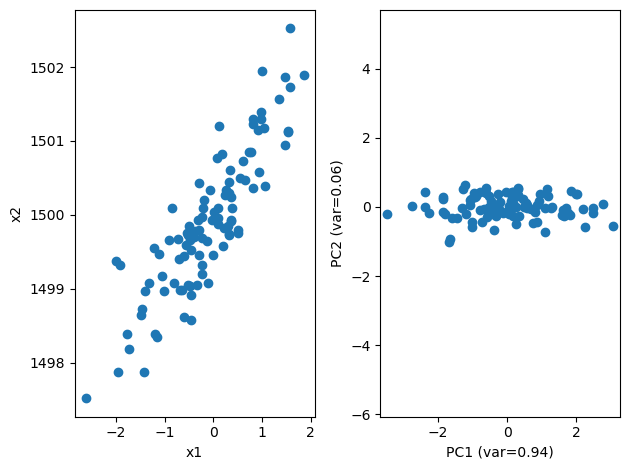

In [7]:
np.random.seed(42)  # Set random seed for reproducibility

# dataset
n_samples = 100     # Number of samples
experience = np.random.normal(size=n_samples)                            # Generate random experience data
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)  # Generate salary data
X = np.column_stack([experience, salary])                                # Combine experience and salary into a dataset

# PCA with scikit-learn
pca = PCA(n_components=2)  # Initialize PCA to keep 2 components
pca.fit(X)                            # Fit PCA model to the data
print("Variance explained by each principal component:",
      pca.explained_variance_ratio_)  # Print the variance explained by each principal component
PC = pca.transform(X)                 # Transform the data into principal component space

plt.subplot(121)  # Create a subplot for the original data
plt.scatter(X[:, 0], X[:, 1])  # Scatter plot of the original data
plt.xlabel("x1")               # Label for the x-axis
plt.ylabel("x2")               # Label for the y-axis

plt.subplot(122)  # Create a subplot for the PCA-transformed data
plt.scatter(PC[:, 0], PC[:, 1])                                  # Scatter plot of the principal components
plt.xlabel("PC1 (var=%.2f)" % pca.explained_variance_ratio_[0])  # Label for PC1 with variance explained
plt.ylabel("PC2 (var=%.2f)" % pca.explained_variance_ratio_[1])  # Label for PC2 with variance explained
plt.axis('equal')   # Set equal aspect ratio for the plot
plt.tight_layout()  # Adjust subplot parameters for a cleaner layout

## Multi-Dimensional Scaling (MDS)
The purpose of MDS is to find a low-dimensional projection of the data in which the pairwisedistances between data points is preserved, as closely as possible (in a least-squares sense).

#### Example:
The eurodist datset provides the road distances (in kilometers) between 21 cities in Europe.
Given this matrix of pairwise (non-Euclidean) distances D = [𝑑𝑖𝑗], MDS can be used to recover
the coordinates of the cities in some Euclidean referential whose orientation is arbitrary.

In [10]:
# Read the text file into a pandas DataFrame
df = pd.read_csv('data/eurodist.txt', delimiter=',')

# Show the first few rows of the DataFrame
df.head()

,city,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
0,Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
1,Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
2,Brussels,2963,1318,0,204,583,206,966,677,2256,...,2084,690,1558,1011,925,747,285,1511,1616,1175
3,Calais,3175,1326,204,0,460,409,1136,747,2224,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
4,Cherbourg,3339,1294,583,460,0,785,1545,853,2047,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   city             21 non-null     object
 1   Athens           21 non-null     int64 
 2   Barcelona        21 non-null     int64 
 3   Brussels         21 non-null     int64 
 4   Calais           21 non-null     int64 
 5   Cherbourg        21 non-null     int64 
 6   Cologne          21 non-null     int64 
 7   Copenhagen       21 non-null     int64 
 8   Geneva           21 non-null     int64 
 9   Gibraltar        21 non-null     int64 
 10  Hamburg          21 non-null     int64 
 11  Hook of Holland  21 non-null     int64 
 12  Lisbon           21 non-null     int64 
 13  Lyons            21 non-null     int64 
 14  Madrid           21 non-null     int64 
 15  Marseilles       21 non-null     int64 
 16  Milan            21 non-null     int64 
 17  Munich           21 non-null     int6

In [12]:
print(df.iloc[:5, :5])

        city  Athens  Barcelona  Brussels  Calais
0     Athens       0       3313      2963    3175
1  Barcelona    3313          0      1318    1326
2   Brussels    2963       1318         0     204
3     Calais    3175       1326       204       0
4  Cherbourg    3339       1294       583     460


In [13]:
city = df["city"]             # Extract the 'city' column from the DataFrame
D = np.array(df.iloc[:, 1:])  # Create a NumPy array from the distance matrix (excluding the first column)

# Arbitrary choice of K=2 components for MDS
from sklearn.manifold import MDS

# Initialize MDS with the specified parameters
mds = MDS(dissimilarity='precomputed', n_components=2, random_state=40, max_iter=3000, eps=1e-9)  # Create an MDS instance
X = mds.fit_transform(D)  # Fit the MDS model and transform the distance matrix into 2D coordinates

Recover coordinates of the cities in Euclidean referential whose orientation is arbitrary:

In [15]:
from sklearn import metrics 

# Compute pairwise Euclidean distances between samples in X
Deuclidean = metrics.pairwise.pairwise_distances(X, metric='euclidean')

# Print the rounded pairwise distance matrix for the first 5 samples
print(np.round(Deuclidean[:5, :5]))

[[   0. 3116. 2994. 3181. 3428.]
 [3116.    0. 1317. 1289. 1128.]
 [2994. 1317.    0.  198.  538.]
 [3181. 1289.  198.    0.  358.]
 [3428. 1128.  538.  358.    0.]]


Plot the results:

(-1894.0919178069153,
 2914.355437087124,
 -1712.9733697197485,
 2145.437068788015)

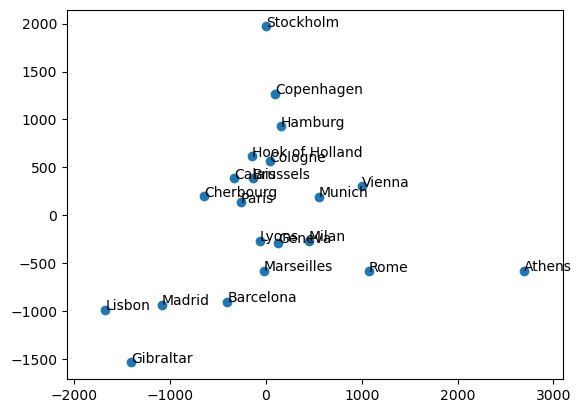

In [17]:
# Plot: apply some rotation and flip
theta = 80 * np.pi / 180.                         # Convert angle from degrees to radians for rotation
rot = np.array([[np.cos(theta), -np.sin(theta)],  # Define the rotation matrix
                 [np.sin(theta), np.cos(theta)]])
Xr = np.dot(X, rot)                               # Apply rotation to the coordinates

# Flip x-coordinate values
Xr[:, 0] *= -1                                    # Invert the x-coordinates to flip the plot
plt.scatter(Xr[:, 0], Xr[:, 1])                   # Create a scatter plot of the rotated and flipped coordinates

# Annotate points with city names
for i in range(len(city)):                        # Loop through each city
    plt.text(Xr[i, 0], Xr[i, 1], city[i])         # Add text labels at the respective coordinates

plt.axis('equal')                                 # Set equal scaling for both axes to maintain the aspect ratio

The result you obtained, which is a tuple of four numbers, represents the limits of the axes in the 3D plot. Specifically:

    First Number (-1894.09): The minimum value on the x-axis.
    Second Number (2914.35): The maximum value on the x-axis.
    Third Number (-1712.97): The minimum value on the y-axis.
    Fourth Number (2145.43): The maximum value on the y-axis.

## Determining the number of components
We must choose 𝐾* ∈ {1, . . . , 𝐾} the number of required components. Plotting the values ofthe stress function, obtained using 𝑘 ≤ 𝑁 − 1 components. In general, start with 1, . . . 𝐾 ≤ 4.Choose 𝐾* where you can clearly distinguish an elbow in the stress curve.

Thus, in the plot below, we choose to retain information accounted for by the first two components, since this is where the elbow is in the stress curve.

[48644495.28571429, 3356497.365752386, 2858455.495887963, 2756310.6376280114]


Text(0, 0.5, 'stress')

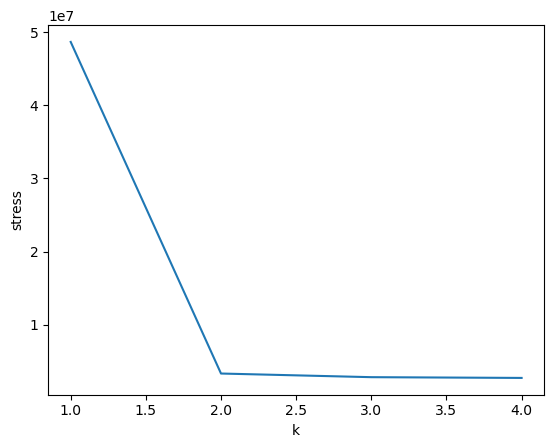

In [20]:
k_range = range(1, min(5, D.shape[0]-1))   # Define range of k values from 1 to the minimum of 4 or (number of cities - 1)

stress = [MDS(dissimilarity='precomputed',                 # Perform MDS with precomputed dissimilarities
               n_components=k,                             # Set number of dimensions to k
               random_state=42,                            # Set random state for reproducibility
               max_iter=300,                               # Set maximum number of iterations for MDS
               eps=1e-9).fit(D).stress_ for k in k_range]  # Store stress value for each k

print(stress)              # Print the list of stress values for each k
plt.plot(k_range, stress)  # Plot stress values against k
plt.xlabel("k")            # Label x-axis as "k"
plt.ylabel("stress")       # Label y-axis as "stress"

High Stress Value for k=1: The first value (`48644495.28571429`) corresponds to the stress for one dimension. This high stress indicates that the configuration of the points in one-dimensional space does not adequately represent the distances in the original high-dimensional space. A high stress value suggests poor fitting.

Decreasing Stress Values: The subsequent values show a significant drop in stress as the number of dimensions increases. For example:

For k=2: `3356497.365752386`

For k=3: `2858455.495887963`

For k=4: `2756310.6376280114`

This trend suggests that adding more dimensions allows for a better representation of the original data, leading to lower stress values.

Interpretation of Stress: In MDS, stress is a measure of how well the distances between points in the lower-dimensional space correspond to the distances in the original space. Lower stress values indicate a better fit.

Plotting Stress: The text `Text(0, 0.5, 'stress')` indicates that a label for the y-axis has been set to "stress" in the plot, providing context for the plotted values.

## Nonlinear Dimensionality Reduction

Nonlinear dimensionality reduction or **manifold learning** cover unsupervised methods that
attempt to identify low-dimensional manifolds within the original 𝑃-dimensional space that
represent high data density. Then those methods provide a mapping from the high-dimensional
space to the low-dimensional embedding.

(-5.263300792026618, 5.403426565408858, -1.222836429817459, 1.278952725143332)

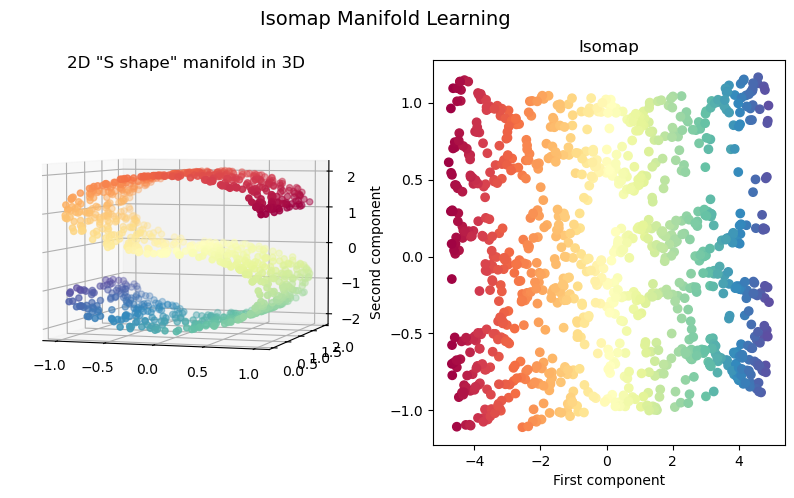

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

X, color = datasets.make_s_curve(1000, random_state=42)               # Generate a 3D S-curve dataset with 1000 samples
fig = plt.figure(figsize=(10, 5))                                     # Create a figure with specified size
plt.suptitle("Isomap Manifold Learning", fontsize=14)                 # Set the overall title for the figure
ax = fig.add_subplot(121, projection='3d')                            # Add a 3D subplot to the figure
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)  # Scatter plot of the 3D data
ax.view_init(4, -72)                                                  # Set the view angle for the 3D plot
plt.title('2D "S shape" manifold in 3D')                              # Title for the 3D plot

Y = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(X)  # Apply Isomap to reduce dimensions to 2
ax = fig.add_subplot(122)                                             # Add a 2D subplot to the figure
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)          # Scatter plot of the 2D representation
plt.title("Isomap")                                                   # Title for the 2D Isomap plot
plt.xlabel("First component")                                         # Label for the x-axis
plt.ylabel("Second component")                                        # Label for the y-axis
plt.axis('tight')                                                     # Adjust the axis limits

The result you obtained, which is a tuple of four numbers, represents the limits of the axes in the 3D plot. Specifically:

    First Number (-5.2633): The minimum value on the x-axis.
    Second Number (5.4034): The maximum value on the x-axis.
    Third Number (-1.2228): The minimum value on the y-axis.
    Fourth Number (1.2790): The maximum value on the y-axis.

## Exercises:

### PCA
Write a basic PCA class

Write a class BasicPCA with two methods:

    • fit(X) that estimates the data mean, principal components directions V and the explained variance of each component.
    • transform(X) that projects the data onto the principal components.

Check that your BasicPCA gave similar results, compared to the results from sklearn.

In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA as sklearnPCA

In [28]:
class BasicPCA:
    def __init__(self):
        self.mean_ = None
        self.components_ = None
        self.explained_variance_ = None

    def fit(self, X):
        # Step 1: Center the data
        self.mean_ = np.mean(X, axis=0)  # Mean of each feature
        X_centered = X - self.mean_      # Centering the data

        # Step 2: Compute the covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Step 4: Sort the eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]          # Sort in descending order
        self.explained_variance_ = eigenvalues[sorted_indices]  # Explained variance
        self.components_ = eigenvectors[:, sorted_indices]      # Principal components

    def transform(self, X):
        # Step 1: Center the data
        X_centered = X - self.mean_                  # Centering the data
        return np.dot(X_centered, self.components_)  # Project onto principal components

In [29]:
# Load dataset
iris = load_iris()
X = iris.data

# Using BasicPCA
basic_pca = BasicPCA()
basic_pca.fit(X)
X_transformed_basic = basic_pca.transform(X)

# Using sklearn PCA for comparison
sklearn_pca = sklearnPCA()
X_transformed_sklearn = sklearn_pca.fit_transform(X)

# Comparing results
print("Basic PCA explained variance ratio:\n", basic_pca.explained_variance_ / np.sum(basic_pca.explained_variance_))
print()
print("Sklearn PCA explained variance ratio:\n", sklearn_pca.explained_variance_ratio_)

Basic PCA explained variance ratio:
 [0.92461872 0.05306648 0.01710261 0.00521218]

Sklearn PCA explained variance ratio:
 [0.92461872 0.05306648 0.01710261 0.00521218]


In [30]:
print("Basic PCA transformed data:\n", X_transformed_basic[:5])      # First 5 samples
print()
print("Sklearn PCA transformed data:\n", X_transformed_sklearn[:5])  # First 5 samples

Basic PCA transformed data:
 [[ 2.68412563e+00  3.19397247e-01  2.79148276e-02  2.26243707e-03]
 [ 2.71414169e+00 -1.77001225e-01  2.10464272e-01  9.90265503e-02]
 [ 2.88899057e+00 -1.44949426e-01 -1.79002563e-02  1.99683897e-02]
 [ 2.74534286e+00 -3.18298979e-01 -3.15593736e-02 -7.55758166e-02]
 [ 2.72871654e+00  3.26754513e-01 -9.00792406e-02 -6.12585926e-02]]

Sklearn PCA transformed data:
 [[-2.68412563e+00  3.19397247e-01 -2.79148276e-02  2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01  9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02  1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02 -7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02 -6.12585926e-02]]


### Apply your Basic PCA on the iris dataset

    • Describe the data set. Should the dataset been standardized?
    
    • Describe the structure of correlations among variables.
    
    • Compute a PCA with the maximum number of components.
    
    • Compute the cumulative explained variance ratio. Determine the number of components 𝐾 by your computed values.
    
    • Print the 𝐾 principal components directions and correlations of the 𝐾 principal components with the original variables. Interpret the contribution of the original variables into the PC.
    
    • Plot the samples projected into the 𝐾 first PCs.
    
    • Color samples by their species.

### 1. Describe the Data Set and Standardization

In [33]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()           # Load the iris dataset into a variable
X = iris.data                # Extract feature data
y = iris.target              # Extract target labels
species = iris.target_names  # Extract species names

# Create a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)  # Create a DataFrame with feature names as columns
df['species'] = [species[i] for i in y]           # Add species as a new column based on target labels

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
# Describe the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
# Check for standardization necessity
print("Standard deviation of features:")
print(df.iloc[:, :-1].std())

Standard deviation of features:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


Yes. Too much variation in Standard Deviation. 

### 2. Describe the Structure of Correlations Among Variables

In [38]:
# Compute the correlation matrix
correlation_matrix = df.iloc[:, :-1].corr()
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


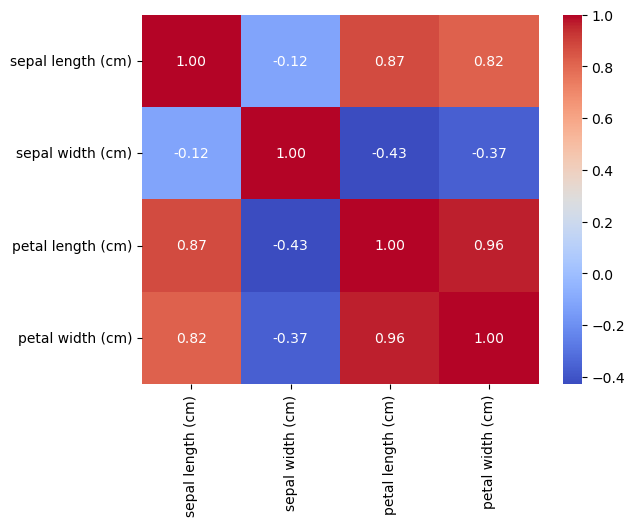

In [39]:
# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f');

### 3. Compute PCA with Maximum Number of Components

In [41]:
from sklearn.decomposition import PCA

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])

# Compute PCA
pca = PCA(n_components=X_scaled.shape[1])
X_pca = pca.fit_transform(X_scaled)

### 4. Compute the Cumulative Explained Variance Ratio

In [43]:
# Cumulative explained variance ratio
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative explained variance ratio:")
print(cumulative_variance)
print()

# Determine the number of components K
K = (cumulative_variance >= 0.95).argmax() + 1  # K is the number of components explaining 95% variance
print(f"Number of components (K) explaining 95% variance: {K}")

Cumulative explained variance ratio:
[0.72962445 0.95813207 0.99482129 1.        ]

Number of components (K) explaining 95% variance: 2


    The first value, 0.7296, indicates that the first principal component accounts for about 72.96% of the total variance in the data.
    The second value, 0.9581, indicates that the first two principal components together account for about 95.81% of the total variance.
    The third value, 0.9948, shows that the first three components explain about 99.48% of the variance.
    The last value, 1.0, indicates that all four components together explain 100% of the variance.

The line `K = (cumulative_variance >= 0.95).argmax() + 1` identifies the minimum number of principal components required to explain at least 95% of the total variance. The result, K = 2, means that the first two principal components are sufficient to account for 95% of the variance in the dataset.

### 5. Print the K Principal Components Directions and Correlations

In [46]:
# Principal components directions
print("Principal components directions (loadings):\n")
print(pca.components_[:K])

Principal components directions (loadings):

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


##### ---------------------------------------- PC1 ------------------------------------------

* The values [0.52106591, -0.26934744, 0.5804131, 0.56485654] indicate how much each original feature contributes to the first principal component (PC1).

* A positive value indicates a positive correlation with the PC, while a negative value indicates an inverse correlation.

* In this case, the first principal component is heavily influenced by the features associated with these loadings. 

For instance:

    Sepal length: 0.5211
    Sepal width: -0.2693 (inverse relationship)
    Petal length: 0.5804
    Petal width: 0.5649

##### ---------------------------------------- PC2 -------------------------------------------

* The values [0.37741762, 0.92329566, 0.02449161, 0.06694199] show the contribution of the original features to the second principal component (PC2).

* Here, the second principal component is significantly influenced by the 'Sepal width' (0.9233), while the contributions of the other features are relatively low.

In [48]:
# Correlations of the K principal components with the original variables
loadings = pd.DataFrame(pca.components_[:K], columns=df.columns[:-1], index=[f'PC{i+1}' for i in range(K)])
print("Correlations of K principal components with original variables:\n")
print(loadings)

Correlations of K principal components with original variables:

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.521066         -0.269347           0.580413          0.564857
PC2           0.377418          0.923296           0.024492          0.066942


The output shows the correlations of the first two principal components (PC1 and PC2) with the original features of the iris dataset. 

Examples:

* Sepal length (0.521066): There is a moderate positive correlation with PC1, meaning that as the sepal length increases, the value of PC1 tends to increase as well.
* Sepal width (-0.269347): There is a small negative correlation with PC1, indicating that as the sepal width increases, the value of PC1 tends to decrease.

In [50]:
# Interpret the contribution of original variables
for i in range(K):
    print(f"PC{i+1} contributes from variables:\n", loadings.iloc[i].abs().nlargest(3))  # Top 3 contributions
    print()

PC1 contributes from variables:
 petal length (cm)    0.580413
petal width (cm)     0.564857
sepal length (cm)    0.521066
Name: PC1, dtype: float64

PC2 contributes from variables:
 sepal width (cm)     0.923296
sepal length (cm)    0.377418
petal width (cm)     0.066942
Name: PC2, dtype: float64



* PC1 reflects the characteristics of petal dimensions, making it a useful component for understanding variations related to petal features.
* PC2 emphasizes the importance of sepal width, providing insight into variations related to the sepal features.

### 6. Plot Samples Projected into the K First PCs

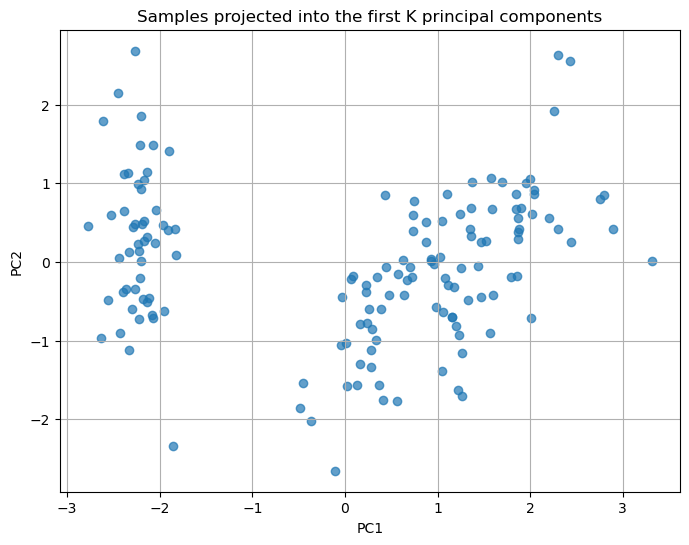

In [53]:
# Project the samples into the first K PCs
X_k_pca = X_pca[:, :K]

# Plotting the samples
plt.figure(figsize=(8, 6))
plt.scatter(X_k_pca[:, 0], X_k_pca[:, 1], alpha=0.7)
plt.title('Samples projected into the first K principal components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

### 7. Color Samples by Their Species

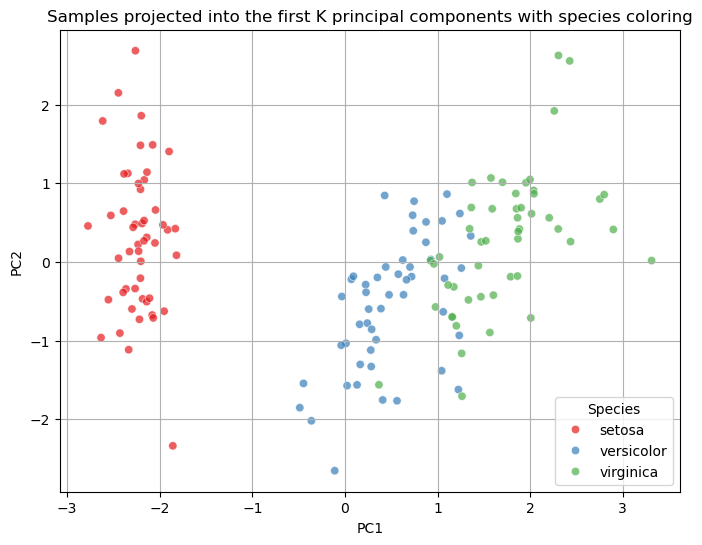

In [55]:
# Plotting with species color
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_k_pca[:, 0], y=X_k_pca[:, 1], hue=df['species'], palette='Set1', alpha=0.7)
plt.title('Samples projected into the first K principal components with species coloring')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Species')
plt.grid()
plt.show()

## MDS
Apply MDS from sklearn on the iris dataset

    1. Center and scale the dataset.
    
    2. Compute Euclidean pairwise distances matrix.
    
    3. Select the number of components.
    
    4. Show that classical MDS on Euclidean pairwise distances matrix is equivalent to PCA.

#### 1. Center and scale the dataset

In [58]:
# Load the iris dataset
iris = load_iris()  # Load the dataset
X = iris.data       # Extract features
y = iris.target     # Extract target labels

# 1. Center and scale the dataset
X_centered = X - X.mean(axis=0)              # Center the dataset by subtracting the mean
scaler = StandardScaler()                    # Initialize the scaler
X_scaled = scaler.fit_transform(X_centered)  # Scale the centered dataset

#### 2. Compute Euclidean pairwise distances matrix

In [60]:
# Compute Euclidean pairwise distances matrix
distances = pairwise_distances(X_scaled, metric='euclidean')  

# Show some distances
print("Pairwise distances (first 5 samples):\n")
print(np.round(distances[:5, :5], 4))             # print(distances[:5, :5])

Pairwise distances (first 5 samples):

[[0.     1.1762 0.8456 1.1037 0.2601]
 [1.1762 0.     0.5234 0.434  1.3865]
 [0.8456 0.5234 0.     0.2839 0.9916]
 [1.1037 0.434  0.2839 0.     1.2502]
 [0.2601 1.3865 0.9916 1.2502 0.    ]]


#### 3. Select the number of components

In [62]:
n_components = 2  # Set the number of components for MDS

#### 4. Show that classical MDS on Euclidean pairwise distances matrix is equivalent to PCA.

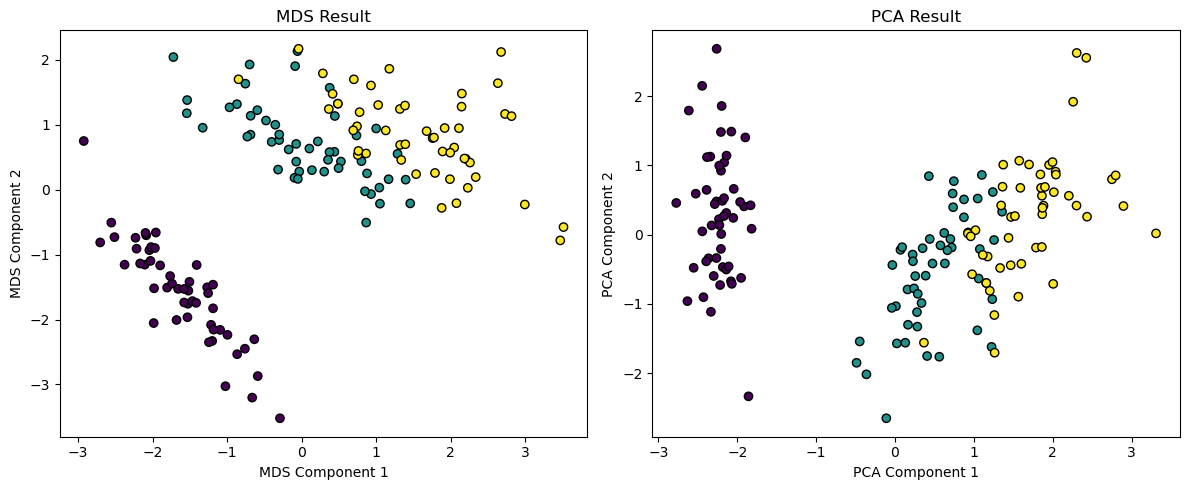

In [64]:
from sklearn.manifold import MDS  # Import MDS
from sklearn.decomposition import PCA  # Import PCA

# 1. Apply Classical MDS on the Euclidean pairwise distances matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)  # Initialize MDS
X_mds = mds.fit_transform(distances)                                     # Fit and transform the distance matrix

# 2. Compute PCA on the scaled data
pca = PCA(n_components=2)            # Initialize PCA for 2 components
X_pca = pca.fit_transform(X_scaled)  # Fit and transform the scaled dataset

# 3. Compare the results
# Create a figure for the plots
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot MDS results
plt.subplot(1, 2, 1)                                                       # First subplot
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='viridis', edgecolor='k')  # Scatter plot for MDS
plt.title('MDS Result')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')

# Plot PCA results
plt.subplot(1, 2, 2)                                                       # Second subplot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')  # Scatter plot for PCA
plt.title('PCA Result')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()          # Display the plots

* MDS: We initialize MDS to reduce the dimensionality of the pairwise distance matrix to 2 components, using the dissimilarity='precomputed' argument.
* PCA: We perform PCA on the standardized data, also reducing it to 2 components.
* Comparison: Both results are plotted side by side to visually assess their similarity.